# Exercise 1: Linear Regression

We have two exercises:
1. Restaurant franchise trying to decide where to open next. Data: Profits vs. Habitants. (Compulsory).
2. House price model. Data size (square feet) & number of bedrooms vs. price (Optional).

Exercise files:
- `warmUpExercise.m`
- `plotData.m`
- `computeCost.m`
- `gradientDescent.m`
- `computeCostMulti.m`
- `gradientDescentMulti.m`
- `featureNormalize.m`
- `normalEqn.m`

Data:
- `ex1data1.txt`: one variable
- `ex1data2.txt`: multiple variable (optional)

Exercise guide PDF: `ex1.pdf`

Workflow:
- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex1.pdf`
- Whenever an exercise part is finished
  - Check it with `ex1` (1st part) or `ex1_multi` (2nd part, optional) in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal
  - Introduce email and token
  - Results appear

**Overview of exercises and their sections**

1. Linear Regression with One Variable - Restaurant Revenue.
    - Data Loaing & Plotting
    - Formulae and Dimensions of Variables & Parameters
    - Cost Function
    - Gradient Descent
    - Plotting the Cost Function
2. Linear Regression with Multiple Variablees - House prices.
    - Data Loaing & Plotting
    - Feature Normalization
    - Gradient Descent
    - Prediction
    - Different Learning Rates
    

**Setup plotting**

In [5]:
graphics_toolkit ("gnuplot");

In [6]:
%plot -b inline:gnuplot

## 1. Linear Regression with One Variable - Restaurant Revenue

### Data Loaing & Plotting

In [22]:
data = load('ex1data1.txt');       % read comma separated data
X = data(:, 1); y = data(:, 2);
m = length(y);                     % number of training examples

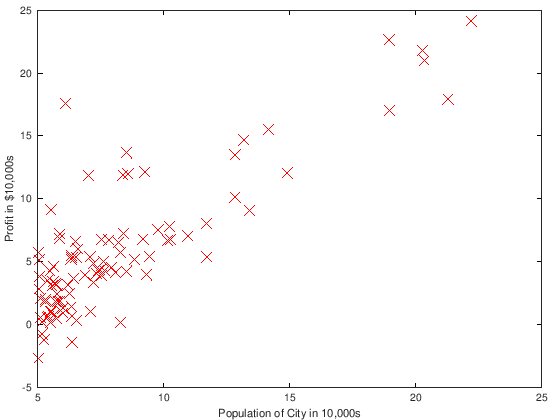

In [23]:
plot(X, y, 'rx', 'MarkerSize', 10); % Plot the data
ylabel('Profit in $10,000s'); % Set the y−axis label
xlabel('Population of City in 10,000s'); % Set the x−axis label

### Formulae and Dimensions of Variables & Parameters

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2$

$h(x^{(i)}) = \theta_0 x_0 + \theta_1 x_1 = \theta_0 + \theta_1 x$

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_j^{(i)}$

$\theta_j \leftarrow \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$

`m` samples: `1 ... m`

`n+1` parameters: `0 ... n`

`X: m x 2`, we need to augment it with $x_0 = 1$

`theta: 2 x 1`, $\theta_0$ is the intercept, associated to $x_0 = 1$

`y: m x 1`

`alpha`

`iterations`

In [34]:
X = data(:, 1);
size(X)

ans =

   97    1



In [35]:
size(y)

ans =

   97    1



In [36]:
% X augmented with x_0 = 1
X = data(:, 1);
X = [ones(size(X,1),1),X];

In [37]:
size(X)

ans =

   97    2



In [40]:
% First sample: x_0^(1), x_1^(1)
X(1,:)

ans =

   1.0000   6.1101



In [42]:
theta = zeros(2,1)

theta =

   0
   0



In [43]:
iterations = 1500;
alpha = 0.01;

### Cost Function

In [52]:
m = length(y);

In [53]:
p = X*theta; % m x 1

In [54]:
e = (p-y).^2; % m x 1 

In [55]:
sum(e)

ans = 6222.1


In [56]:
J = (0.5/m)*sum(e)

J = 32.073


### Gradient Descent

In [77]:
iterations = 1500
alpha = 0.01
theta = zeros(2,1)

iterations = 1500
alpha = 0.010000
theta =

   0
   0



In [78]:
m = length(y);
J_history = zeros(iterations,1);

for i = 1:iterations
    % Cost derivatives: dJ/dt
    p = X*theta; % m x 1
    d = (p-y);
    dJ_0 = (1.0/m)*d'*X(:,1);
    dJ_1 = (1.0/m)*d'*X(:,2);
    % Update theta
    t0 = theta(1,1) - alpha*dJ_0;
    theta(1,1) = t0;
    t1 = theta(2,1) - alpha*dJ_1;
    theta(2,1) = t1;    
    % Compute Cost
    p = X*theta; % m x 1
    e = (p-y).^2; % m x 1 
    J = (0.5/m)*sum(e);
    J_history(i) = J;
end

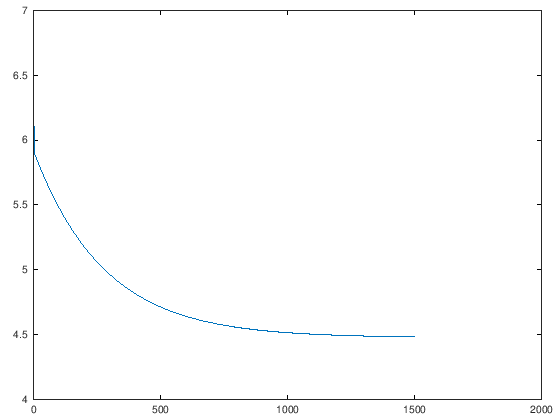

In [80]:
plot([1:iterations],J_history)

In [81]:
predict1 = [1, 3.5] * theta
predict2 = [1, 7] * theta

predict1 = 0.4520
predict2 = 4.5342


In [95]:
% Plot scatterplot with regression line
x1 = 5:0.1:25;
p = theta(1) + x1*theta(2);
X = [ones(size(X,1),1),data(:, 1)];
y = data(:, 2);

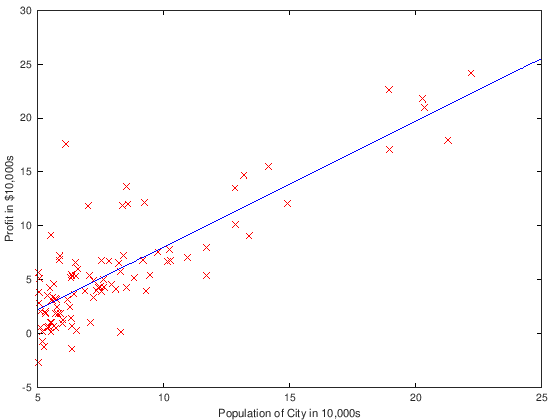

In [96]:
plot(X(:,2),y(:),'rx')
hold on;
plot(x1,p,'b')
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');

### Plotting the Cost Function

In [126]:
theta0_vals = linspace(-10,10,100);
theta1_vals = linspace(-1,4,100);

In [127]:
X = [ones(size(X,1),1),data(:, 1)];
y = data(:, 2);
m = length(y);

In [128]:
% initialize J vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));
% Fill out J vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
        t = [theta0_vals(i); theta1_vals(j)];
        % Compute Cost
        p = X*t; % m x 1
        e = (p-y).^2; % m x 1 
        J = (0.5/m)*sum(e);
        %J_vals(i,j) = computeCost(x, y, t);
        J_vals(i,j) = J;
    end
end

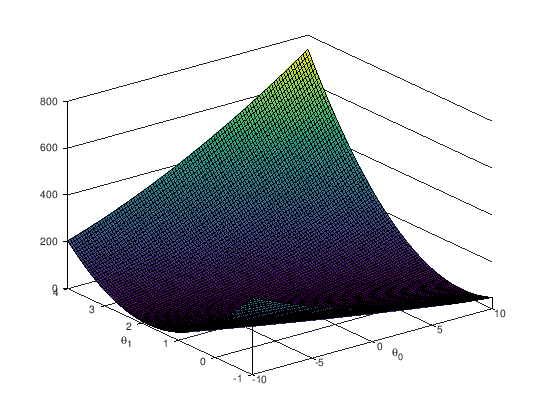

In [129]:
% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
surf(theta0_vals,theta1_vals,J_vals)
xlabel('\theta_0')
ylabel('\theta_1')

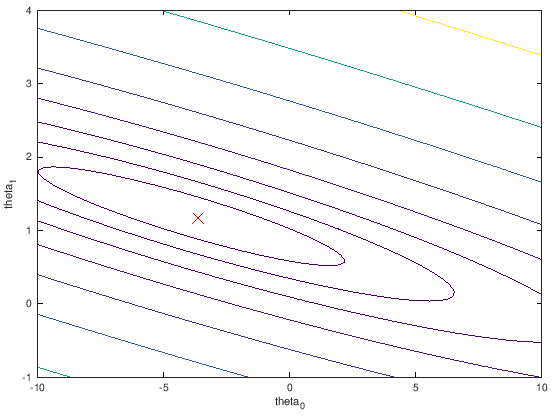

In [130]:
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
%contour(theta0_vals,theta1_vals,J_vals,20)
contour(theta0_vals,theta1_vals,J_vals,logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);

## 2. Linear Regression with Multiple Variablees - House prices

### Data Loading and Plotting

In [164]:
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

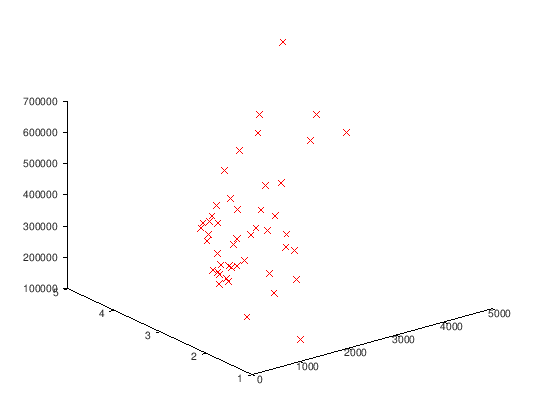

In [165]:
plot3(X(:,1),X(:,2),y,'rx')

### Feature Normalization

In [183]:
y = data(:, 3);
m = length(y);
X = [ones(m,1),data(:, 1:2)]; % augment with x_0

In [184]:
mean_x1 = mean(X(:,2)); % Store for later, to undo/apply
std_x1 = std(X(:,2)); % Store for later, to undo/apply
x1 = (X(:,2)-mean_x1)/std_x1;

In [185]:
mean_x2 = mean(X(:,3)); % Store to undo later
std_x2 = std(X(:,3));
x2 = (X(:,3)-mean_x2)/std_x2;

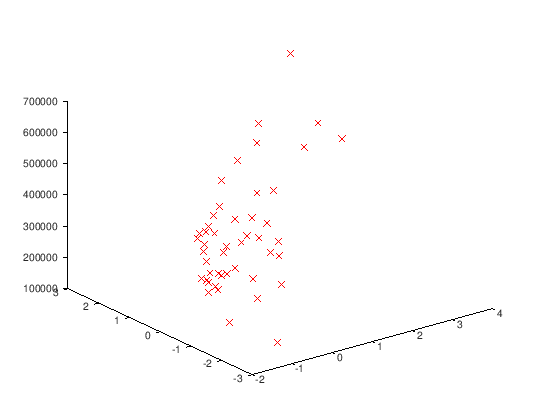

In [186]:
plot3(x1,x2,y,'rx')

#### Vectorial Implementation: Better!

In [226]:
X = data(:, 1:2); % Note: no x_0 augmentation yet!
y = data(:, 3);
m = length(y); % samples
n = size(X,2); % features

In [227]:
X_norm = X;
% Save them for later, to undo/apply the scaling
mu = zeros(1, n);
sigma = zeros(1, n);

In [228]:
for j = 1:n
    mu(j) = mean(X(:,j));
    sigma(j) = std(X(:,j));
    X_norm(:,j) = (X(:,j)-mu(j))/sigma(j);
end

In [229]:
size(X_norm)

ans =

   47    2



### Gradient Descent

In [230]:
% Augment the normalized independent variable X with x_0 = 1 
X_norm = [ones(m,1),X_norm];

In [231]:
size(X_norm)

ans =

   47    3



In [232]:
iterations = 1500
alpha = 0.01
theta = zeros(n+1,1)

iterations = 1500
alpha = 0.010000
theta =

   0
   0
   0



In [233]:
J_history = zeros(iterations,1);

In [234]:
for k = 1:iterations
    p = X_norm*theta; % m x 1
    d = (p-y);
    dJ = zeros(1,n+1); % n features, n+1 parameters
    for j = 1:(n+1)
        % Cost derivative
        dJ(1,j) = (1.0/m)*d'*X_norm(:,j);
        % Update theta
        theta(j,1) = theta(j,1) - alpha*dJ(1,j);
    end
    % Compute Cost
    p = X_norm*theta; % m x 1
    e = (p-y).^2; % m x 1 
    J = (0.5/m)*sum(e);
    J_history(k) = J;
end

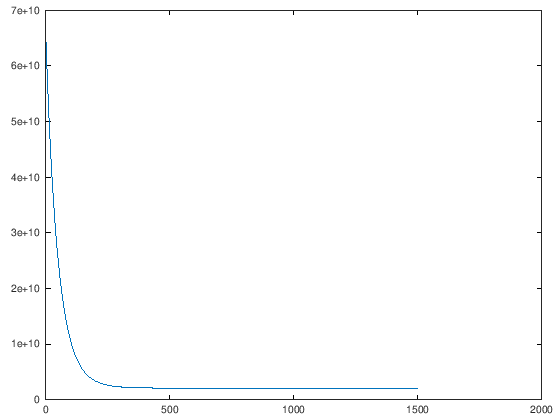

In [235]:
plot([1:iterations],J_history)

### Prediction

In [238]:
% Estimate the price of a 1650 sq-ft, 3 br house
X = [1650, 3];
X_norm = [(X(1,1)-mu(1))/sigma(1), (X(1,2)-mu(2))/sigma(2)];
price = [1, X_norm]*theta

price = 2.9310e+05


### Different Learning Rates

In [252]:
X = data(:, 1:2); % Note: no x_0 augmentation yet!
y = data(:, 3);
m = length(y); % samples
n = size(X,2); % features

In [253]:
X_norm = X;
mu = zeros(1, n);
sigma = zeros(1, n);

In [254]:
for j = 1:n
    mu(j) = mean(X(:,j));
    sigma(j) = std(X(:,j));
    X_norm(:,j) = (X(:,j)-mu(j))/sigma(j);
end

In [255]:
X_norm = [ones(m,1),X_norm];

In [267]:
% Compute the cost during the gradient descent or different learning rates
% Increase alpha by 3x at each step
alpha = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0];
a = length(alpha);
num_iters = 100;
J_history = zeros(num_iters,a);
theta = zeros(n+1, a);
for k = 1:a
    [t, J] = gradientDescentMulti(X_norm, y, theta(:,k), alpha(1,k), num_iters);
    theta(:,k) = t;
    J_history(:,k) = J;
end

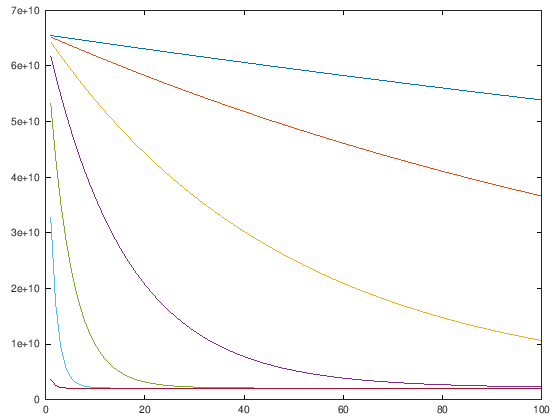

In [270]:
it = [1:num_iters];
plot(it,J_history(:,1))
hold on;
plot(it,J_history(:,2))
plot(it,J_history(:,3))
plot(it,J_history(:,4))
plot(it,J_history(:,5))
plot(it,J_history(:,6))
plot(it,J_history(:,7))